# INSIGHT 심화세션 사전과제
## 04. 언어 모델&생성 모델

## <span style="background-color:#F993C0; color:#311d26; padding:4px; border-radius:0px;"> 언어 모델 </span>

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> 언어 모델이란? </span>

언어 모델 : 단어 시퀀스(문장)에 확률을 할당하여, 가장 자연스러운 단어 시퀀스를 찾아내는 모델

→ 언어 모델이 문장의 자연스러움을 판단하게 하는 가장 보편적인 방법은 '이전 단어들'이 주어졌을 때 '다음 단어'를 예측하도록 훈련시키는 것!

|  | 핵심 원리 | 계산 복잡도 | 예시 |
| --- | --- | --- | --- |
| **통계 기반** | 문장의 등장 빈도를 기반으로 **확률**을 계산 | 상대적으로 낮고, 학습 속도가 빠름 | N-gram, Perplexity  |
| **인공 신경망 기반** | 단어를 벡터로 표현하고, 신경망을 이용해 다음 단어 예측 | 높고, 학습에 많은 시간과 컴퓨팅 자원이 필요 | RNN, LSTM, GRU, Transformer (BERT, GPT 등) |

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> SLM </span>

<span style="color:#f993c0;"> SLM이란? </span>

통계 기반 언어 모델(SLM)은 **분포 가설(Distributional Hypothesis)**이라는 아주 중요한 아이디어에 근거!

분포 가설이란?   
: 비슷한 문맥에서 함께 나타나는 단어들은 비슷한 의미를 가진다

**1. 조건부 확률**

**정의** 

두 확률 P(A)와 P(B)가 있을 때, A가 일어났다는 전제 하에 B가 일어날 확률을 의미하며, 다음과 같은 관계를 가집니다.

- `P(B|A) = P(A, B) / P(A)`
- `P(A, B) = P(A) * P(B|A)`

각 단계에서 계산된 확률을 모두 곱하면, 문장 전체의 최종 확률이 계산됨

⇒ **이 확률값이 높을수록** 모델은 해당 문장을 **더 자연스럽다**고 판단합니다.

**2. 카운트 기반**

**정의**

이전 단어 시퀀스의 **등장 빈도**를 통해 다음 단어의 확률을 계산

→ 각 부분의 확률은 학습 데이터에서 **실제 단어의 등장 횟수(카운트)**를 세어 계산

⇒ 카운트 기반의 통계적 언어 모델은 직관적이지만 희소 문제(Sparsity Problem)를 가짐!

<span style="color:#f993c0;"> N-gram </span>

**정의** 

N-gram은 연속된 n개의 단어 묶음(시퀀스)을 의미   
→ 문장을 정해진 n개의 단위로 잘라 토큰화하는 것

- **n=1 (unigram)**: 오늘, 날씨가, 좋다
- **n=2 (bigram)**: 오늘 날씨가, 날씨가 좋다
- **n=3 (trigram)**: 오늘 날씨가 좋다
- **n=4 (4-gram)**: (문장이 3단어라 해당 없음)

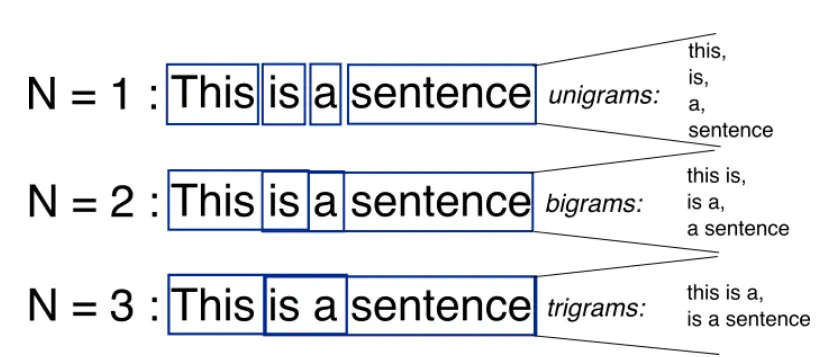

⇒ N-gram은 통계적 언어 모델의 한계를 일부 개선했지만, 여전히 희소 문제와 문맥 파악의 한계를 극복하지 못했고, 이는 인공 신경망 언어 모델의 등장으로 이어짐

<span style="color:#f993c0;"> Perplexcity </span>

PPL은 언어 모델이 특정 문장을 얼마나 '**혼란스러워(perplexed) 하는지**'를 나타내는 수치
- '**헷갈리는 정도**'를 의미

> **핵심**: **PPL은 낮을수록 좋다!**   
PPL 수치가 낮다는 것은 모델이 덜 혼란스러워한다는 뜻이며, 이는 곧 언어 모델의 성능이 좋다는 것을 의미
>



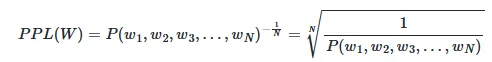

- **W**: 평가하려는 문장
- **N**: 문장 W에 포함된 단어의 총 개수
- **P(W)**: 언어 모델이 문장 W에 부여하는 확률

수식에서 볼 수 있듯이, 모델이 문장의 확률 P(W)를 높게 예측할수록(즉, 문장을 자연스럽다고 판단할수록) PPL 값은 낮아짐

**PPL에 영향을 주는 요인들**

**(1) 문장(W)의 희소성** 

- 문장 W가 희소하게 등장하면 모델이 훈련 데이터에서 더 적게 봤으므로, 예측할 때 더 혼란스럽기 때문에 **W가 희소하게 등장할수록 PPL이 커짐**

**(2) 문장의 길이 (단어 개수 N)**

- **단어 개수 N이 커지면** 함께 보는 단어들이 더 많아지니까, 희소한 부분이 있더라도 그 안에 예측이 쉬운 단어들도 같이 있어서 **PPL을 낮춰줌.**

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> 딥러닝 기반 언어모델 </span>

<span style="color:#f993c0;"> LLM </span>

**LLM이란?**

대규모 언어 모델(Large Language Model, LLM)   
: 방대한 양의 데이터를 학습하여, 인간의 언어를 이해하고 생성하며 요약하는 등 다양한 작업을 수행하도록 설계된 **인공지능 모델**

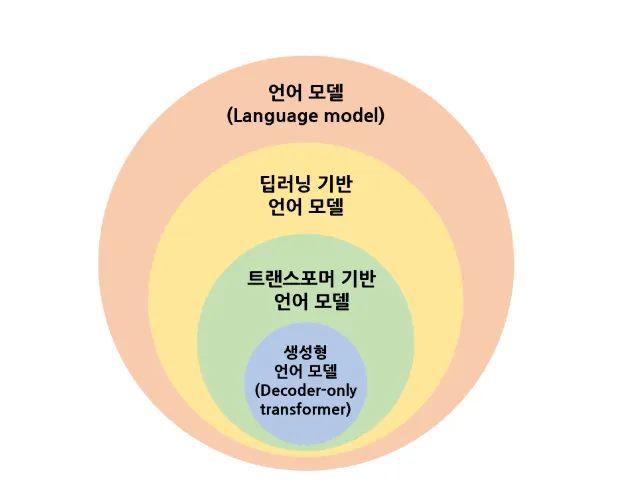

LLM은 크게 '학습'과 '예측'이라는 두 가지 핵심 단계를 통해 작동

1. **대규모 학습 (Training)**
LLM은 인터넷의 웹페이지, 책, 기사 등 수십억 개의 문장으로 이루어진 방대한 데이터를 학습합니다. 이 과정에서 단순히 정보를 암기하는 것을 넘어, 단어와 단어 사이의 관계, 문맥적 의미, 문법 구조, 그리고 세상의 지식까지 **언어의 패턴**을 스스로 터득합니다.
2. **예측 및 생성 (Prediction & Generation)**
학습이 완료된 LLM은 사용자의 질문이나 지시(프롬프트)를 받으면, 학습한 패턴을 기반으로 **다음에 올 가장 확률 높은 단어를 순서대로 예측**하며 응답을 생성합니다.

텍스트 생성, 기계 번역, 질의응답, 문서 요약, 감정 분석 등에 사용!

<span style="color:#f993c0;"> BERT </span>

**BERT = Bidirectional Encoder Representations from Transformers**

- **Bidirectional :** 텍스트의 앞뒤 문맥을 동시에 고려해서
- **Encoder :** 입력값을 벡터로 바꿔주는
- **Transformers :** 딥러닝 모델이다.

⇒ **트랜스포머**의 **인코더** 부분을 활용해 만든 **양방향** 언어 모델

> 특징

- **양방향** 

    : 문장을 읽을 때 앞뒤를 동시에 고려 

    → 즉, 한 단어를 이해할 때 그 단어의 좌우 문맥을 동시에 보고 이해

- **트랜스포머 기반** 

    : 트랜스포머 구조의 **encoder** 부분만 사용 (GPT는 decoder만 활용)

- **사전 학습 + 파인 튜닝** 

    : 큰 데이터로 먼저 일반적인 언어 능력을 배우고, 나중에 특정 과제에 맞게 살짝 조정

    : Masked Language Model(MLM)과 Next Sentence Prediction(NSP)를 통해 사전 학습

**BERT의 구조**

: BERT의 기본 구조는 **트랜스포머의 인코더를 쌓아 올린 구조**

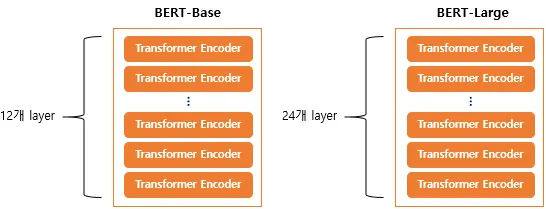

**처리과정**

**: input → Embedding → 트랜스포머 인코더 12개(or 24개) → Output**

**Embedding**

입력된 단어들은 **숫자 벡터**로 바뀌어야 모델이 이해할 수 있음

| 임베딩 종류 |  역할 |
| --- | --- |
| 🟨 **Token Embedding** | 단어 자체의 의미 |
| 🟩 **Segment Embedding** | 두 개 이상의 문장이 들어왔을 때 어떤 문장인지 구분 |
| ⬜️ **Position Embedding** | 단어가 문장에서 몇 번째인지 위치 정보 포함 |

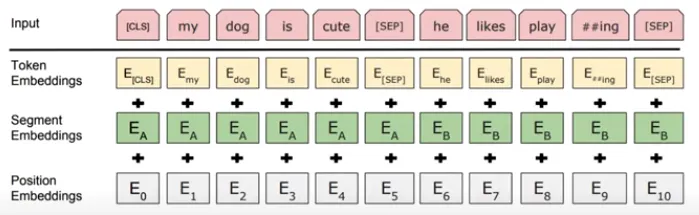

⇒ 세 개의 정보를 더해서 하나의 입력 벡터 생성!

사전학습(1) : Masked Language Model(MLM)

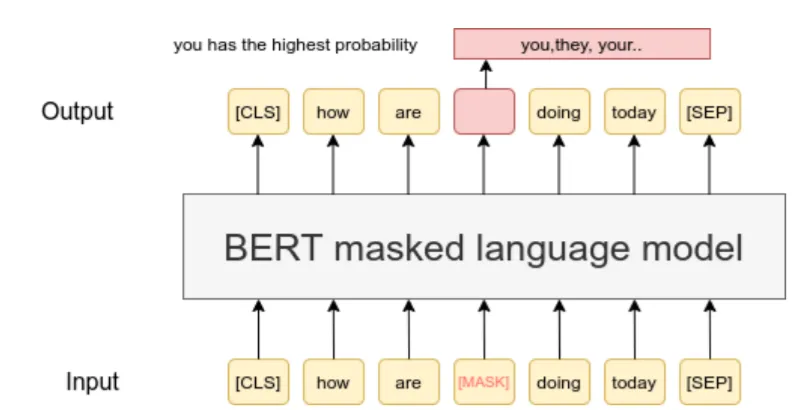

- 문장 속 단어를 일부 가려 놓고, 그 가려진 단어가 뭔지 맞추는 방식의 학습
- 이 학습을 통해 자연스럽게 문맥을 이해하고 추론하는 능력이 길러짐

**사전학습(2) : Next Sentence Prediction(NSP)**

- 두 문장이 실제로 이어지는 문장인지 아닌지 맞히는 학습
- 문장 간 관계 이해 능력을 기르기 위함

<span style="color:#f993c0;"> GPT </span>

***GPT란?***

- Generative Pre-trained Transformer의 약자로 Open AI라는 기업에서 만든 LLM 모델

한계

**Hallucination (환각)**

- GPT등 LLM 모델에서 가장 유명한 문제 중 하나
- 사실과 다른 내용을 그럴듯하게 만들어내는 현상 
- GPT-5에서 약 11.6%까지 감소시킴 → 완벽하게 해결 X

**업데이트 비용**

- LLM은 파라미터 수가 수백억~수천억 개에 달함
- 새로운 정보를 반영하려면 전체 모델을 재학습해야 하는 경우가 많음
- 학습/추론에 막대한 계산 자원(GPU, TPU 등)과 비용이 필요

<span style="color:#f993c0;"> RAG </span>

: Retrieval Augmented Generation의 줄임말로 관련된 정보를 검색하여 먼저 찾고, 이를 LLM에 같이 넣어 최종 답변을 생성하는 하나의 파이프라인

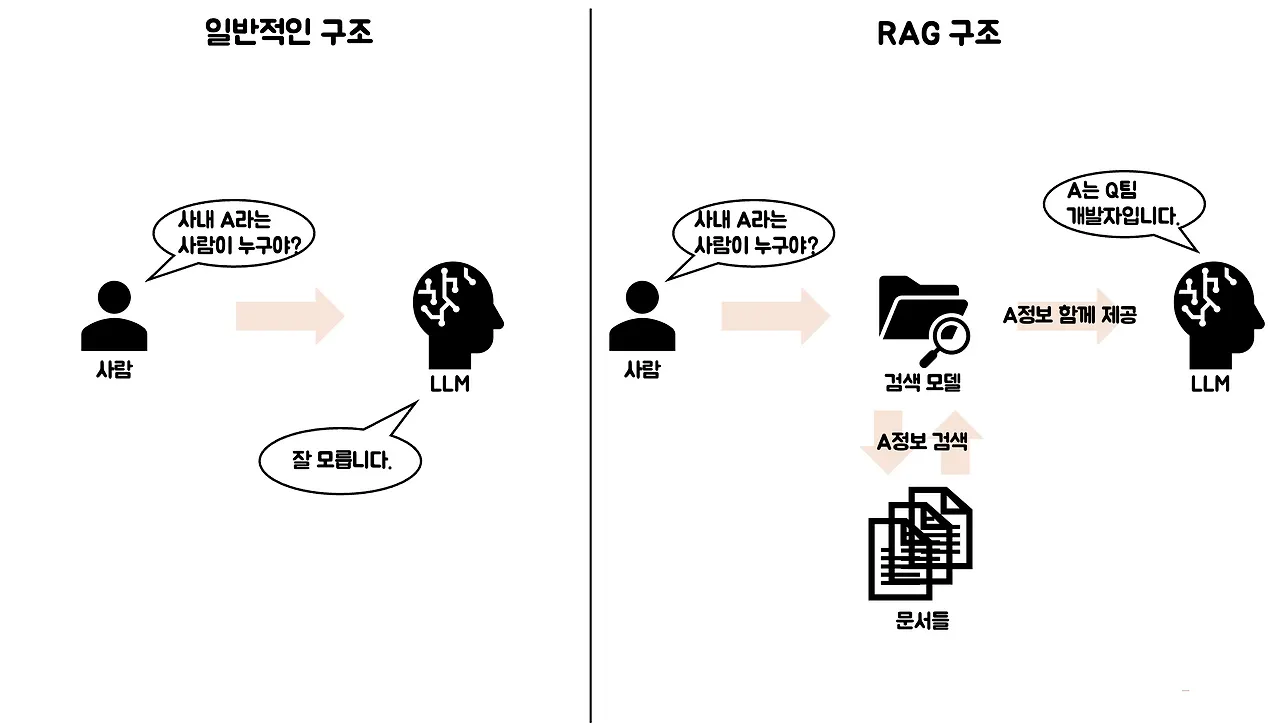

<RAG 구조>

1. **질의 인코더(Query Encoder)**
    1.  사용자의 질문을 이해하기 위한 언어 모델
    2.  주어진 질문을 벡터 형태로 인코딩
2. **지식 검색기(Knowledge Retriever)**
    1. 인코딩된 질문을 바탕으로 외부 지식 베이스에서 관련 정보를 검색
    2. 예를 들어 Wikipedia, 뉴스 기사, 전문 서적 등 방대한 문서 집합에서 질문과 연관된 문단이나 구절을 찾아냄
3. **지식 증강 생성기(Knowledge-Augmented Generator)**
    1. 검색된 지식을 활용하여 질문에 대한 답변을 생성하는 언어 모델
    2.  기존의 LLM과 유사하지만, 검색된 지식을 추가 입력으로 받아 보다 정확하고 풍부한 답변을 생성 가능

장점

- **풍부한 정보 제공**: RAG 모델은 검색을 통해 얻은 외부 데이터를 활용하여, 보다 구체적이고 풍부한 정보를 제공할 수 있습니다.
- **실시간 정보 반영**: 최신 데이터를 검색하여 반영함으로써, 모델이 실시간으로 변화하는 정보에 대응할 수 있습니다.
- **환각 방지**: 검색을 통해 실제 데이터에 기반한 답변을 생성함으로써, 환각 현상이 발생할 위험을 줄이고 정확도를 높일 수 있습니다.

**Credibility-Aware Generation**

- RAG의 한계를 보완하기 위해 제안된 프레임워크
- 기존 RAG는 외부 문서를 검색해 모델에 제공함으로써 지식 부족 문제와 hallucination을 어느 정도 완화할 수 있지만, 검색된 문서 중 일부가 신뢰성이 낮거나 잘못된 정보일 경우 생성된 답변의 품질과 정확도가 크게 떨어질 수 있습니다.
- CAG는 이러한 잘못된 컨텍스트가 모델 성능에 미치는 부정적 영향을 최소화하고, 모델이 문서를 단순히 활용하는 수준을 넘어 문서의 신뢰도를 스스로 판단하고 활용할 수 있도록 훈련시키는 기법

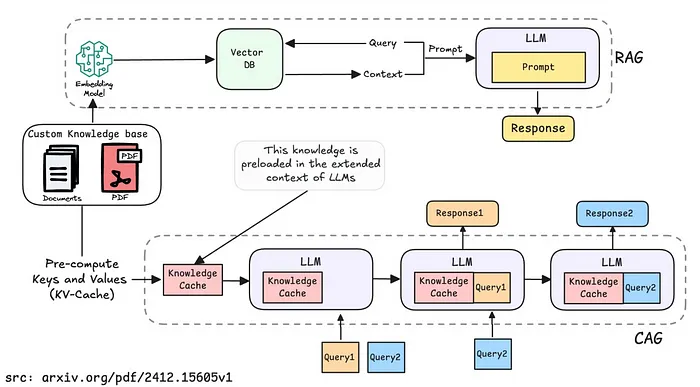

<span style="color:#f993c0;"> LangChain </span>

**<LangChain 의 특징>**

1. **추상화**
- LLM 서비스를 만들 때 필요한 각종 작업을 간결하게 표현해주고 간소화 해줌

2. **표준화**
- 비슷한 기능을 갖추고 있는 요소들을 똑같은 형식을 갖춘 컴포넌트로 표준화 해줌

3. **체이닝**
- 자주 활용하는 주요 컴포넌트를 쉽게 연결해서 LLM 서비스의 로직을 쉽게 파악
- 대부분의 컴포넌트는 인풋에 대해서 아웃풋을 주는 형태로 구성

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> sLM </span>

sLM(소규모 언어 모델)은 자연어 콘텐츠를 처리, 이해 및 생성할 수 있는 AI 모델로, LLM(대규모 언어 모델)보다 규모와 범위가 작음

| 구분 | sLM (소규모 언어 모델) | LLM (대규모 언어 모델) |
| --- | --- | --- |
| 매개변수 개수 | 수백만 ~ 수십억 | 수천억 ~ 수조 |
| 학습 데이터양 | 소규모 | 대규모 |
| 장점 | **경량화, 빠른 학습/추론, 특정 작업 최적화, 적은 비용** | 높은 성능과 범용성 |
| 단점 | 제한된 성능과 범용성 | 높은 연산 자원 필요 |
| 주요 사용처 | 엣지/**모바일 장치, 오프라인 환경** | 클라우드 기반 AI 서비스 등 |
| 예시 | GPT-4o mini, DistilBERT, Gemma, SmolLM-1.7B, Llama | GPT, BERT, Gemini |

<span style="color:#f993c0;"> 모델 압축 </span>

1. 가지치기   
: 신경망에서 중요도가 더 낮거나, 중복되거나, 불필요한 매개변수를 제거하는 방법!

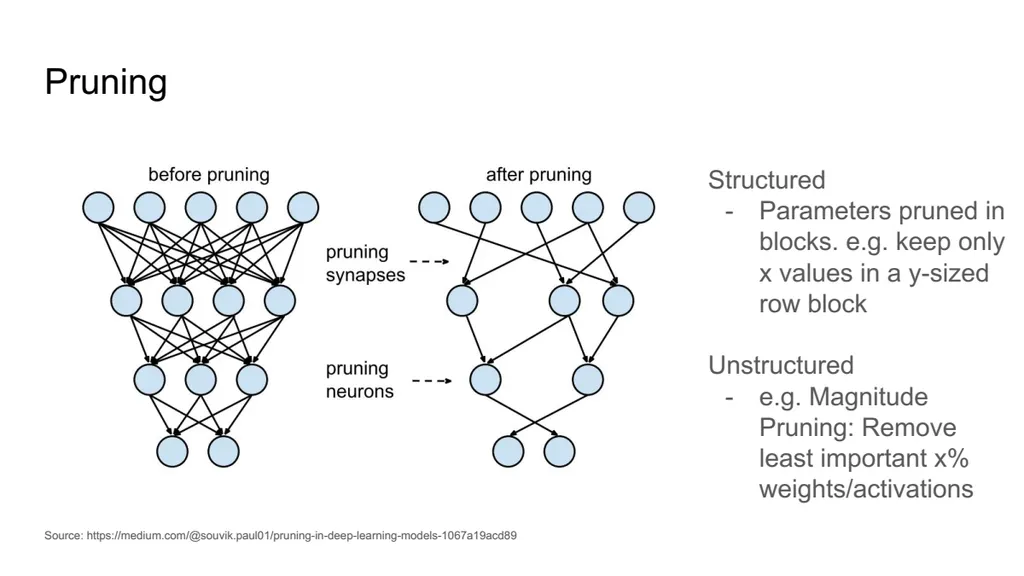

2. 양자화   
: 고정밀 데이터를 저정밀 데이터로 변환하는 방법!

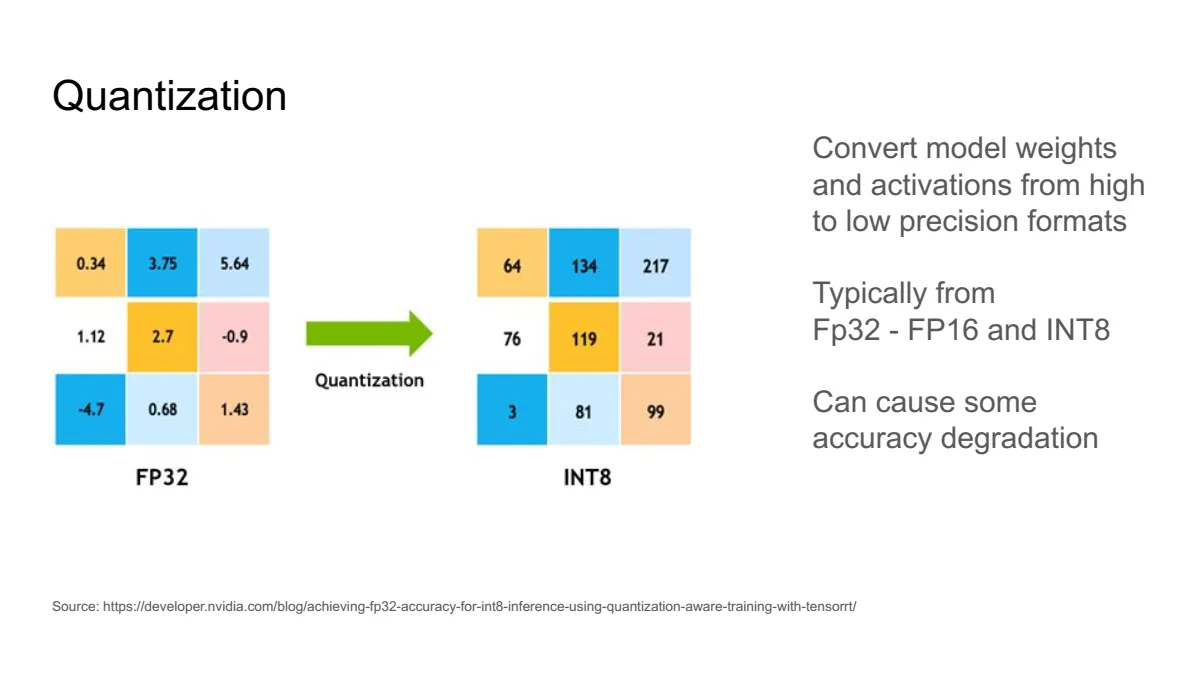

3. 지식 증류   
: 사전 학습된 "교사 모델"의 학습 내용을 "학생 모델"로 이전하는 방법!

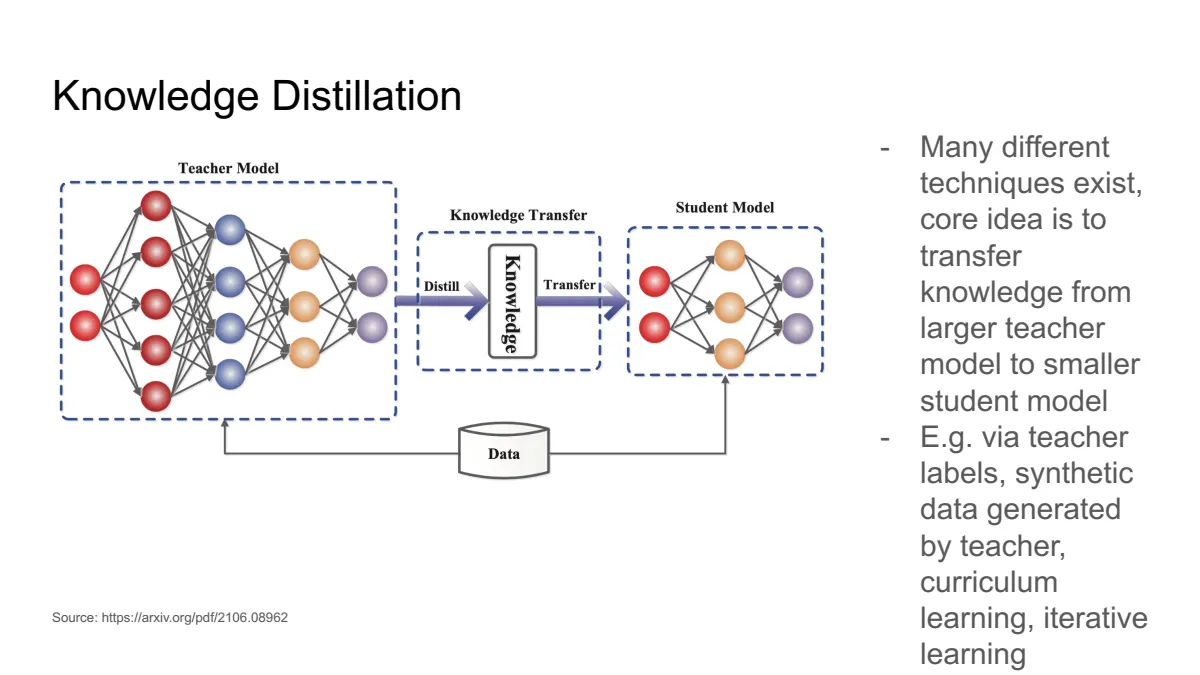

<span style="color:#f993c0;"> 예시 </span>

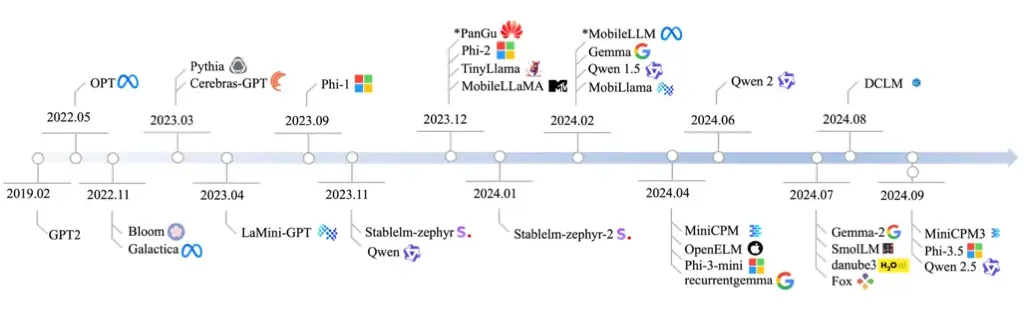

<span style="color:#f993c0;"> 장점 </span>

1. 프라이버시: 외부 서버가 아닌 로컬 환경에서 실행될 수 있어 보안에 유리
2. 비용 절감: 학습과 추론에 필요한 자원이 적어 비용이 낮고 에너지 소비가 적음
3. 효율성 & 맞춤화: 특정 작업에 최적화되기 쉬우며, 실시간 처리와 같은 분야에서 높은 성능을 보임

<span style="color:#f993c0;"> 한계 </span>

- **편향:** sLM은 LLM에 존재하는 **편향**으로부터 학습할 수 있으며, 이는 **성능저하**로 이어질 수 있음
- **제한된 일반화:** sLM은 LLM에 비해 **광범위한 지식 기반이 부족함**으로 특정 작업에 더 적합하고, 포괄적이거나 복잡한 지식이 필요한 작업에는 성능이 떨어질 수 있음
- **할루시네이션(환각):** LLM과 마찬가지로 sLM도 할루시네이션 현상이 발생할 수 있음
- **성능과 용량의 한계**: ‘small’ Language Model 이기 때문에 LLM보다는 학습과 추론에서 성능과 용량이 부족

<span style="color:#f993c0;"> 결합 추론 </span>

**작동 원리**

1. **작은 모델(sLM)이 먼저 풀어봐요 👨‍🎓**
    
    우선, 소형 언어 모델(sLM)이 문제에 대한 단계별 풀이 초안을 만듭니다.
    
2. **각 단계를 평가하고 점수를 매겨요 📝**
    
    sLM이 만든 각 풀이 단계가 얼마나 믿을만한지 시스템이 자동으로 **점수를 매겨 평가**합니다. 점수가 높으면 '확실함 ✅', 낮으면 '불확실함 ❓'으로 판단하는 것이죠.
    
3. **어려운 부분만 큰 모델(LLM)이 도와줘요 🧑‍🏫**
    
    만약 특정 단계의 점수가 기준보다 낮아 '불확실하다'고 판단되면, 그 **한 단계만** 대규모 언어 모델(LLM)에게 요청하여 더 정확한 내용으로 수정합니다. 나머지 점수 높은 단계들은 그대로 사용합니다.

전체 문제를 LLM에게 맡기지 않고 꼭 필요할 때만 도움을 받기 때문에, LLM 수준의 높은 정확도를 달성하면서도 LLM 토큰 사용량을 최대 90%까지 절약할 수 있다!!

## <span style="background-color:#F993C0; color:#311d26; padding:4px; border-radius:0px;"> 생성 모델 </span>

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> 분류 모델 vs 생성 모델 </span>

> **생성 모델(Generative Model)**
> 

주어진 학습 데이터를 학습하여, **학습 데이터의 분포**를 따르는 **유사한 데이터**를 **생성**하는 모델

- **분류 모델**을 학습시킬 때, 훈련 데이터의 각 샘플에는 정답 레이블이 있음
- 반면 **생성 모델은 샘플에 레이블을 지정하는 데는 관심이 없음    
생성 모델은 입력 데이터의 확률 분포 P(x)를 알고자 하는 것**

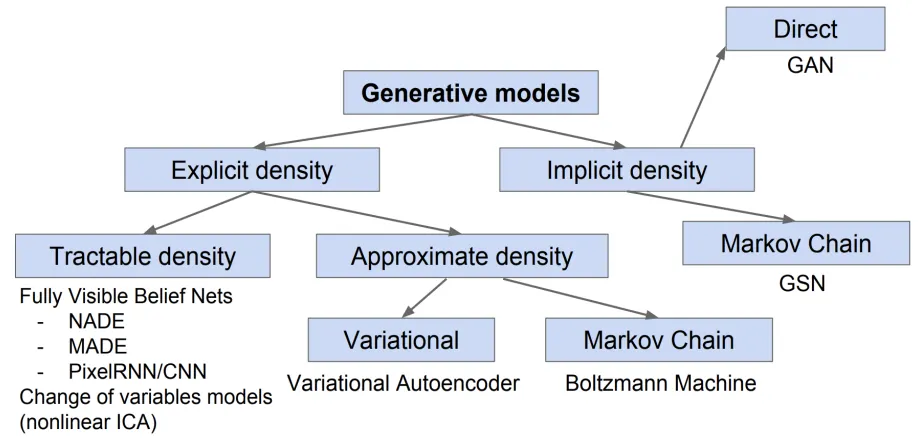

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> AE, VAE </span>

<span style="color:#f993c0;"> AE </span>

> **Auto Encoder (AE)**
> 
- **오토인코더**는 입력과 동일한 출력을 만드는 것을 목적으로 하는 신경망
- **차원 축소, 특징 추출, 노이즈 제거, 이상 탐지** 등 데이터 복원이나 특성 학습에 많이 사용됨

구조

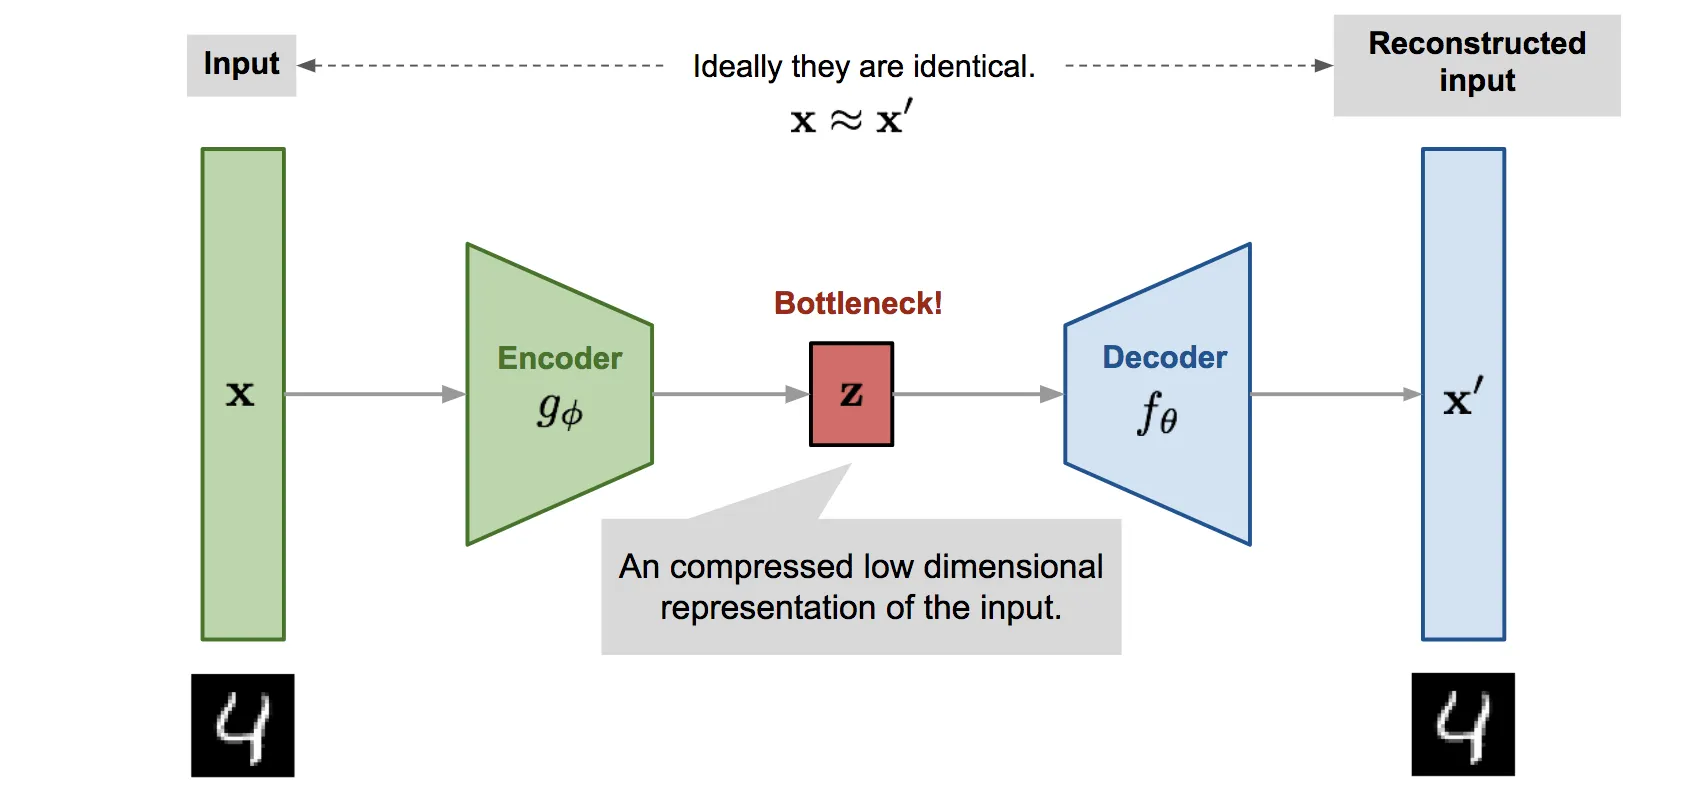

- 인코더($g_\phi$): 원래의 고차원 입력 데이터($\mathbf{x}$)를 잠재 표현($\mathbf{z}$)로 변환하는 네트워크

- 디코더($f_\theta$): 잠재 표현($\mathbf{z}$)을 풀어서 입력을 재복원(reconstruct)하여 출력($\mathbf{x}'$)하는 네트워크

- 잠재 표현($\mathbf{z}$): 원본 데이터를 저차원으로 압축하여 함축된 정보를 저장하고 있는 벡터

<span style="color:#f993c0;"> VAE </span>

> **Variational Auto Encoder (VAE)**
> 
- **랜덤 노이즈**로부터 **원하는 영상**을 얻을 수 없을까?’라는 의문으로부터 시작
- **VAE**는 데이터를 잠재 공간(latent space)으로 인코딩한 다음, 그 잠재 공간에서 다시 데이터를 디코딩하여 원본 데이터와 유사한 결과를 생성하는 방식으로 동작
- **이미지 생성, 텍스트 생성, 신호 처리, 이미지 보간** 등 새로운 데이터를 생성하는 작업에 많이 사용

AE와의 차이점

- VAE는 AE와 상당히 유사한 구조를 갖고 있지만, 탄생 배경도 다르고 목적도 다릅니다.
    - **AE**의 목적은 **Encoder**에 있습니다. AE는 Encoder 학습을 위해 Decoder를 붙인 것입니다.
    - **VAE**의 목적은 **Decoder**에 있습니다. VAE는 Decoder 학습을 위해 Encoder를 붙인 것입니다.

구조

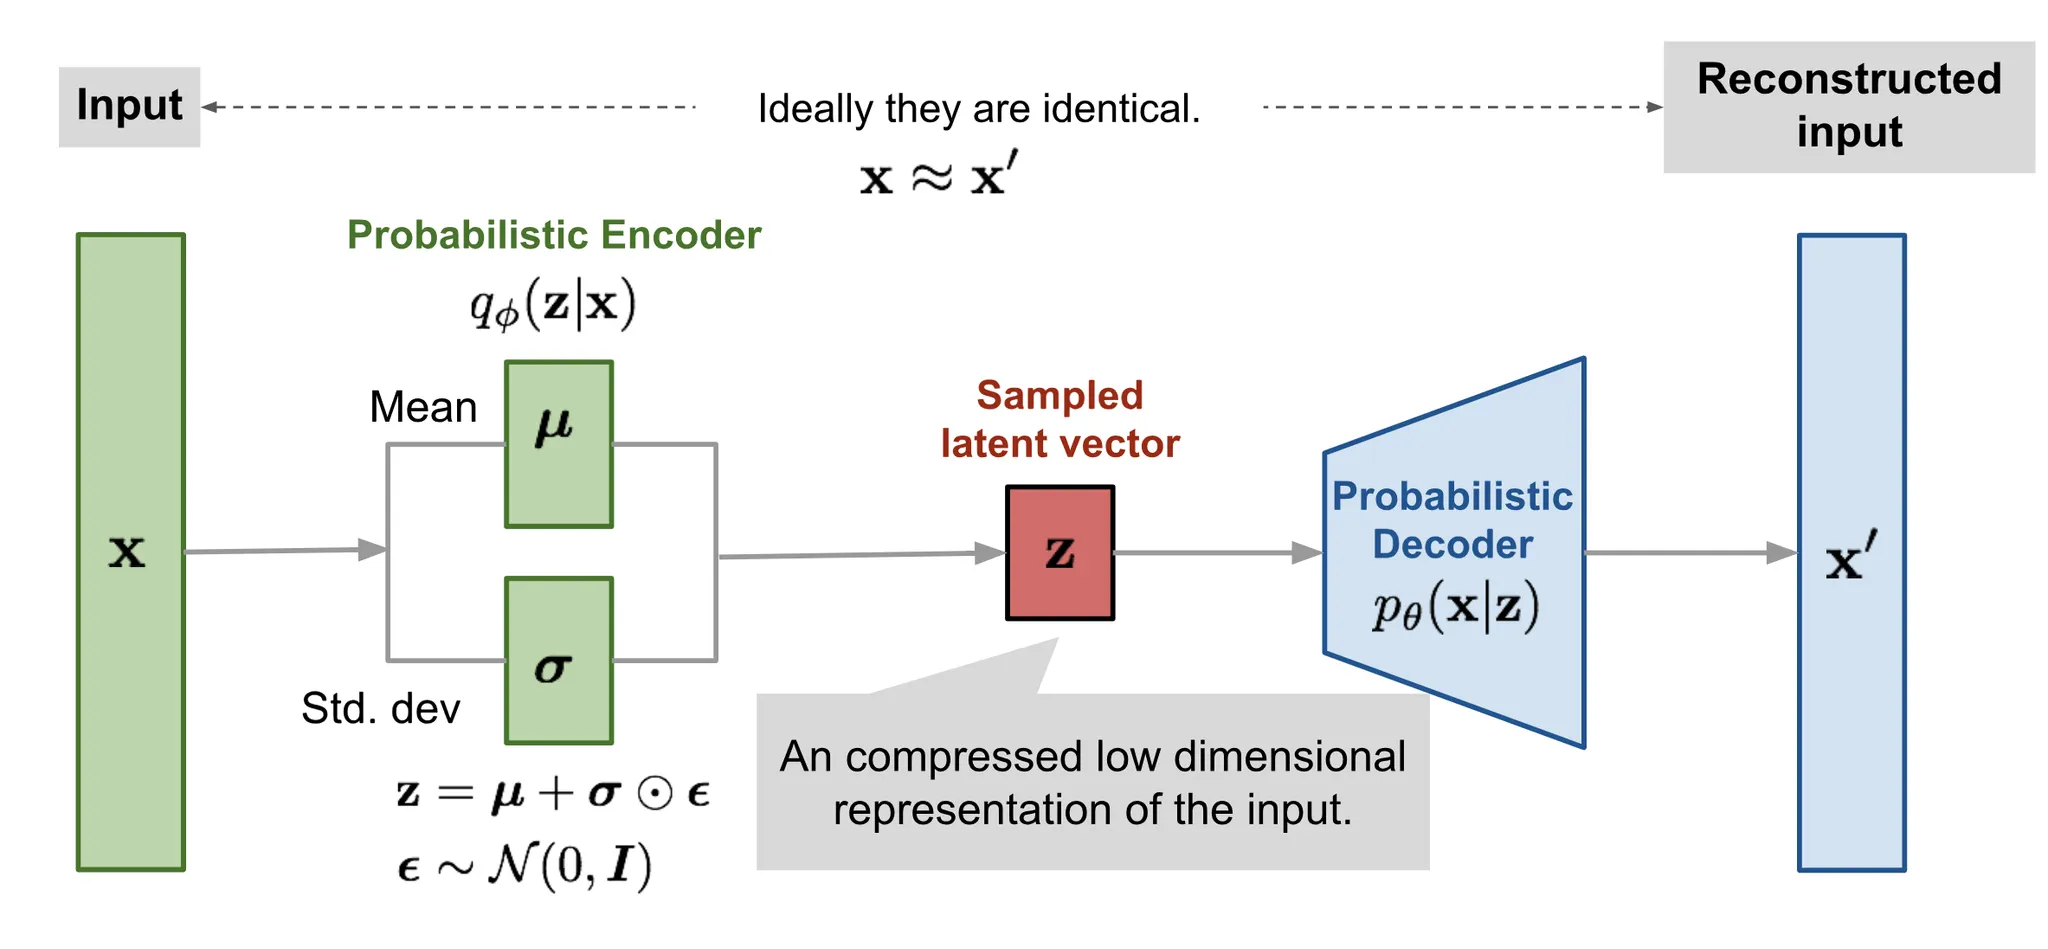

- 인코더($q_\phi$): 원래의 고차원 입력 데이터($\mathbf{x}$)를 단일 벡터가 아닌 분포(평균 $\mu$, 표준편차 $\sigma$)로 변환하는 네트워크

- 잠재 벡터($\mathbf{z}$): 원본 데이터를 저차원으로 압축하여 함축된 정보를 저장하고 있는 벡터

- 디코더($p_\theta$): 샘플링된 잠재 표현($\mathbf{z}$)을 풀어서 입력을 재복원(reconstruct)하여 출력($\mathbf{x}'$)하는 네트워크

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> GAN </span>

생성자 신경망과 판별자 신경망이 서로 적대적으로 경쟁하면서, 훈련을 통하여 자신의 작업을 점점 더 정교하게 수행하는 신경망 모델

구조

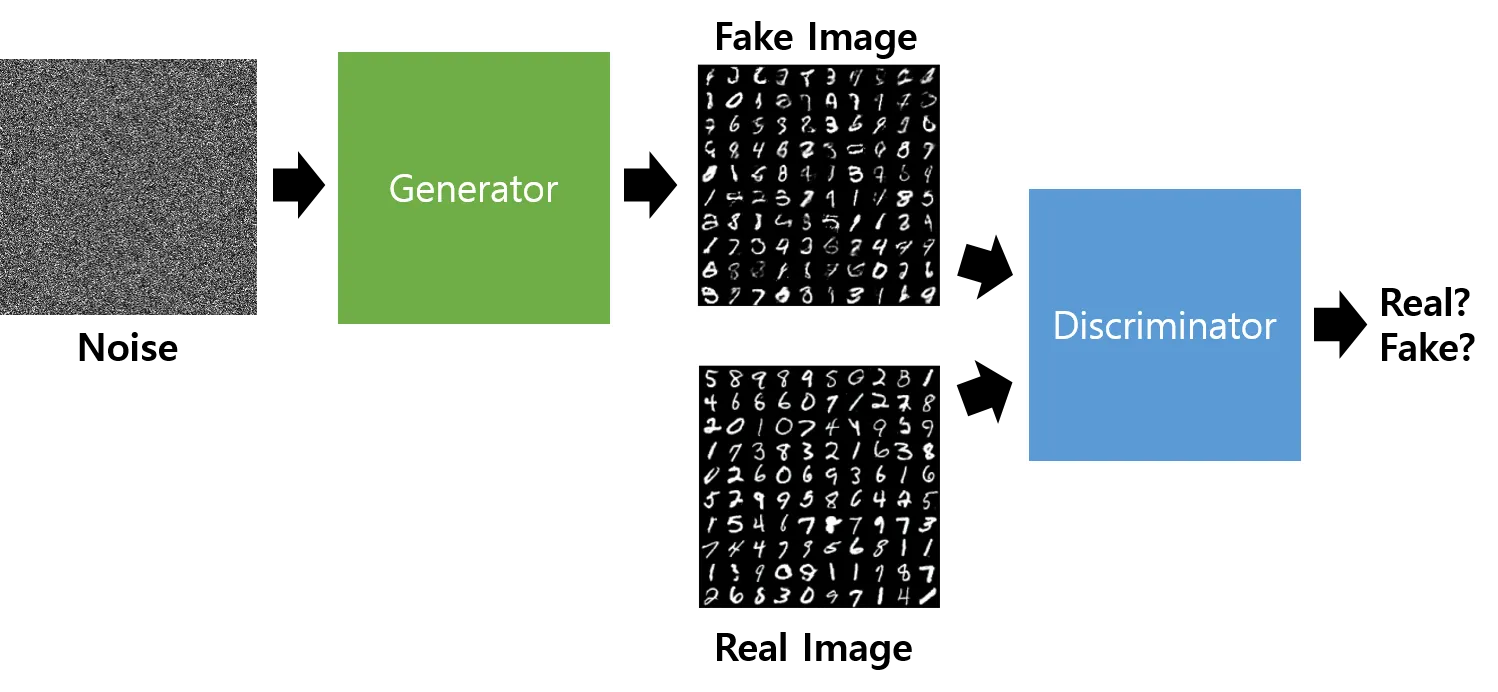

- 생성자의 목적은 판별자를 속일 수 있는, 품질이 높은 위조품을 만드는 것
- 반대로 판별자의 목적은 생성자가 만든 위조품을 정확하게 판별하는 것

<span style="color:#f993c0;"> 장단점 </span>

> **GAN의 장점**
> 
- **진짜 같은 가짜를 생성**할 수 있음(악용 가능성이 존재한다는 점에서 단점이 될 수도 있음)

> **GAN의 한계점**
> 
- **학습이 불안정함** (Training instability) : Oscilation(진동)
- 끝없는 숨바꼭질
- Mode collapsing

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> 확산 모델 </span>

> **Diffusion Model**
> 
- Diffusion Model이란, 
입력 이미지에 (정규 분포를 가진) **Noise를 여러 단계에 걸쳐 추가**하고, 
여러 단계에 걸쳐 (정규 분포를 가진) **Noise를 제거**함으로써, 
**입력 이미지와 유사한 확률 분포를 가진 결과 이미지를 생성**하는 모델
- Diffusion Model의 목표는 
Forward → Reverse 단계를 거친 ‘결과 이미지’를 ‘입력 이미지’의 확률 분포와 유사하게 만드는 것

<span style="color:#f993c0;"> 순확산과 역확산 </span>

순확산: 데이터에 점진적으로 노이즈를 추가하는 과정

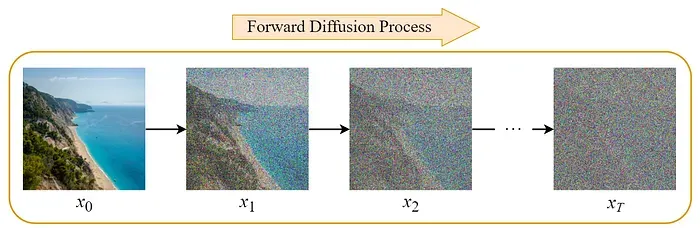

주요 단계

1. **원본 데이터**: 순확산 과정은 원본 데이터에서 시작합니다. 예를 들어, 이미지 데이터를 사용한다고 가정하면, 원본 이미지는 깨끗한 상태입니다.
2. **노이즈 추가**: 원본 데이터에 점진적으로 노이즈를 추가합니다. 이 단계는 여러 번 반복되며, 각 단계에서 데이터에 조금씩 노이즈가 추가됩니다.
3. **완전한 노이즈 데이터**: 충분히 많은 단계가 지나면, 원본 데이터는 완전히 무작위 노이즈로 변합니다.

역확산: 노이즈 데이터에서 원본 데이터를 재구성하는 과정

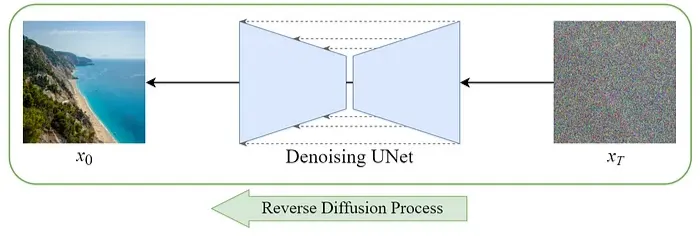

주요 단계

1. **노이즈 데이터**: 역확산 과정은 완전한 노이즈 데이터에서 시작합니다.
2. **노이즈 제거**: 각 단계에서 데이터에서 점진적으로 노이즈를 제거합니다. 이 과정은 순확산 과정의 반대 방향으로 진행됩니다.
3. **원본 데이터 복원**: 충분히 많은 단계가 지나면, 원본 데이터가 복원된다.